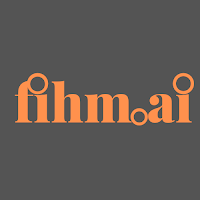

<h1>نظم التوصية Recommendation systems</h1>
نظم التوصية تتكون من مجموعة خوارزميات تستخدم عادةً في توصية المنتجات أو الخدمات للمستخدمين بناءً على معلومات سابقة خاصة بالمستخدم. أصبحت نظم التوصية جزء أساسي وعنصر مهم في عديد من المتاجر الإلكترونية، قاعدات الأفلام والمسلسلات ومواقع البحث عن وظائف. نتطرق في هذا الدرس إلى نظم التوصية المبنية على المحتوى وكيفية تطبيقها وبرمجتها بشكل مبسّط باستخدام لغة Python ومكتبات Pandas.

للإطلاع على شرح مفصل لنظم التوصية وأنواعها يمكنكم زيارة التدوينة التالية: https://www.armaa.tech/2019/05/recommendation-systems.html

### أجندة الدرس

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref4">مقدمة</a></li>
        <li><a href="#ref1">استخراج على البيانات</a></li>
        <li><a href="#ref2">تهيئة البيانات</a></li>
        <li><a href="#ref3">بناء نظام التوصية</a></li>
    </ol>
</div>
<br>

<a id="ref4"></a>
# مقدمة

في هذا الدرس سنبني نظام توصية أفلام يعتمد بشكل رئيسي على تقييم المستخدم للأفلام التي شاهدها. نبدأ باستخراج البيانات عن طريق تنزيل وقراءة ملف بيانات الأفلام وتصنيفاتها. نقوم بتهيئة البيانات عن طريق تشفيرها بتقنية One Hot Encoding اعتماداً على تصنيفات كل فيلم. بعدها نقوم بانشاء مستخدم وهمي يقوم بتقييم عدة أفلام لمحاكاة مستخدمي النظام. نستخدم تقييمات المستخدم في تمكين نظام التوصية والتنبؤ بأنسب الأفلام المشابهة لتفضيلات المستخدم لتوصيته بمتابعتها. 

<a id="ref1"></a>
# استخراج على البيانات

قبل استخراج البيانات والاطلاع على المحتوى، نتأكد أن كل المكتبات اللازمة للاستخراج وتهيئة البيانات متاحة لنا كالتالي:

In [2]:
#Dataframe مكتبة استخدام 
import pandas as pd
#مكتبة الدوال الرياضية ونستورد مكتبة الجذر التربيعي فقط لحاجتنا لها لاحقاً
from math import sqrt
import numpy as np
#مكتبة الرسوم البيانية وتصوير البيانات
import matplotlib.pyplot as plt
%matplotlib inline

لاستخراج البيانات، يمكننا تنزيلها مباشرة من مصدرها على الرابط التالي: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip

نقوم باستحضار البيانات عن طريق قرائتها من الملف الذي تم تخزين البيانات فيه.
ملاحظة: لاتنسى فك الضغط قبل قراءة البيانات! لا تنسى تغيير مسار البيانات في الخلية التالي إلى المسار الذي قمت فيه بتخزين البيانات! مثلاً، قد يبدو المسار الخاص بك كالتالي:  C:/Users/Ahmed/Desktop

نستخدم الدالة head() للتعرف على تنظيم البيانات في movies.csv عن طريق الإطلاع على جزء من البيانات كالتالي

In [24]:
#مكتبة التعامل مع مسارات الملفات على نظام التشغيل
from pathlib import Path

#تأكيد من استبدال المسار حسب مكان تنزيل البيانات
data_folder = Path("C:/Users/Samaa/Desktop")

movies_data = data_folder / "movies.csv"

#نقوم بتخزين بيانات الأفلام في Dataframe
movies_df = pd.read_csv(movies_data) 

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


تم استخراج البيانات بنجاح! والآن نحن جاهزون للبدء بتهيئة البيانات.

نلاحظ أنه تم تنزيل 5 ملفات من الرابط، نركز في هذا الدرس على الملف movies.csv.


<a id="ref2"></a>
# تهيئة البيانات

من المهم فهم تنظيم البيانات قبل البدء في تهيئتها. لنأخذ نظرة سريعة على خصائص مصفوفة الأفلام. نستخدم الدالة head() للإطلاع على جزء من البيانات كالتالي

In [26]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


كما نلاحظ في مخرجات الخلية السابقة، فإن بيانات الأفلام تتكون من مفتاح مميز movieid لكل فيلم، بالإضافة لاسم الفيلم ملحقاً بتاريخ اصداره title والتصنيفات genres التي يندرج تحتها الفيلم.
لتهيئة البيانات يمكننا إزالة سنة الإصدار من خانة العنوان وإلحاقها في خانة جديدة نسميها year.

In [27]:
#نستخدم خواص لغة البايثون في استخراج معلومات سنة الاصدار من خانة العنوان
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#نتخلص من الأقواس حول سنة الإصدار
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#نقوم بإزالة السنة من خانة العنوان لأننا نقلناها لخانة خاصة كما هو ظاهر في السطرين السابقين
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#للتخلص من الفراغات والمسافات الزائدة في خانة العنوان، نقوم باستخدام دالة strip()
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


من أهم خطوات تهيئة البيانات لتطبيق أي نظام توصية، هو فرز التصنيفات التي سيعتمد عليها النظام في توصية المحتوى (في هذه الحالة التصنيفات هي الانواع التي تصف كل فيلم). وجود التصنيف لكل فيلم له قيمة عالية ولكن يجب فرزها حتى يمكننا عزل كل نوع (أكشن، رومنسي، رعب) كخانة منفصلة، مما يسهل علينا تطبيق تقنية "One Hot Encoding" المذكورة سابقاً.
يمكننا استخدام دالة فصل النصوص split .في بايثون 

In [28]:
#التصنيفات مفصولة بالعلامة | مما يسهل عزل التصنيفات وتحويلها لقائمة
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


تقنية "One Hot Encoding" تستخدم في تطوير نظم التوصية بحيث يتم تحويل قائمة التصنيفات إلى خصائص attributes في مصفوفة الأفلام. كل تصنيف يمثل عامود منفصل. في حال ظهر التنصنيف ضمن وصف الفيلم، يحصل الفيلم على قيمة "1" لهذا التصنيف. أما إذا لم يكن التصنيف أحد الأنواع التي تصف الفيلم، يتم استخدام القيمة "0".

إذاً النتيجة هي مصفوفة جديدة بالخصائص التالية: 

In [29]:
#ننسخ بيانات الأفلام لمصفوفة جديدة لإضافة الخصائص.
moviesWithGenres_df = movies_df.copy()

#لكل صف في قاعدة البيانات (تمثل فيلم)، نقوم بإضافة جميع الأصناف المذكورة وتحديد قيمة 1 لتلك الأصناف
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#نملاً كل الخانات المتبقية بالقيمة 0 لنوضح أن الفيلم لا يشمل هذا التصنيف
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


نلاحظ في المصفوفة الظاهرة في الخلية السابقة، أول فيلم Toy Story ينتمي إلى خانة المغامرة، التحريك، فيلم أطفال، كوميدي ولكن لا ينتمي إلى خانة الأفلام الرومنسية أو أفلام الرعب مثلاً.

<a id="ref3"></a>
# بناء نظام التوصية

قبل البدء في بناء التوصيات، يجب الأخذ في عين الاعتبار أن النظام الذي نعمل عليه مبني على المحتوى الذي تقدمه الخدمة. بمعنى، يطمح النظام لتوصية المحتوى اعتماداً على ما أبدى المستخدم إعجابه به في الماضي عن طريق التقييم مثلاً. 
الجدير بالذكر هو أن التوصية بناءً على المحتوى تعتبر نوع واحد من أنواع تطبيق نظم التوصية والأنواع الآخرى حالياً خارج نطاق الدرس.

في النظام الذي سنقوم ببناءه الآن، ننشيء حساب مستخدم وهمي ونضيف تقييماته لخمسة أفلام عشوائية. نستخدم تلك التقييمات في فهم توجهاته ونمط تقييمه للمحتوى. ثم نطوّع تلك المعلومات في توصية أفضل فيلم يطابق اهتمامات المستخدم.

ملاحظة: يمكن للقارئ تغيير التقييمات في متغير حساب المستخدم userInput حسب تقييمة لتلك الأفلام ليحصل على توصيات تتناسب مع تفضيلاته الشخصية! بالإضافة يمكنك إضافة اسماء افلام أخرى وإدخال تقييمك لها وسيعمل النظام على شملها في التنبؤ بالتوصيات!

نبدأ عن طريق تسجيل مستخدم جديد يقوم بتقييم أربع أفلام كالتالي:

In [30]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,rating,title
0,5.0,"Breakfast Club, The"
1,3.5,Toy Story
2,2.0,Jumanji
3,5.0,Pulp Fiction
4,4.5,Akira


#### نضيف هوية كل من الأفلام التي قيمها المستخدم الجديد إلى ملفه عن طريق مطابقة اسم الفيلم مع بمصفوفة الأفلام

نقوم في هذه الخطوة من ربط كل فيلم بالهوية movieId المتسخدمة مسبقاً في مصفوفة الأفلام. هذه العملية تؤكد وجود الفيلم الذي قام المستخدم بتقييمه في مصفوفة الأفلام وبالتالي نتأكد من إمكانية استخدامها لتوصية أفلام جديدة.

نقوم بربط اسم الفيلم من مصفوفة الأفلام بالأفلام التي قام المستخدم بتقييمها كالتالي:

In [32]:
#نطابق اسماء الأفلام التي قيمها المستخدم مع مصفوفة الأفلام للتأكد من وجودها في قاعدة البيانات
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#نقوم باستخدام دالة الدمج لاستخراج هوية الأفلام وإضافتها لقائمة الأفلام التي قيمها المستخدم
inputMovies = pd.merge(inputId, inputMovies)
#يمكننا التخلص من قائمة التصنيفات وسنة الإصدار لعدم حاجتنا لها حالياً
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


كما هو واضح في مخرجات الخلية السابقة، تم إضافة هوية كل فيلم movieId بعد التأكد من وجودها في مصفوفة الأفلام الاساسية.

الخطوة التالية هي فهم تفضيلات المستخدم والتعرف على التصنيفات التي تحصل على تقييم مرتفع. نبدأ بتصفية مصفوفة الأفلام وإزالة جميع الأفلام التي لم يشاهدها المستخدم ولم يقم بتقييمها كالتالي:

In [33]:
#نحافظ على الأفلام التي شاهدها وقيمها المستخدم ونعزلها في متغير جديد userMovies
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


في الخطوات التالية، لا نحتاج المعلومات التفصيلية لكل فيلم فيمكننا إزالتها.

In [34]:
#نعيد تهيئة مؤشرات المصفوفة
userMovies = userMovies.reset_index(drop=True)

#نتخلص من الخواص الغير مهمة في الخطوات التالية
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


تبدو المصفوفة المشفرة جاهزة! كل صف في المصفوفة السابقة يمثل تصنيفات فيلم قام المستخدم بتقييمه. يمكننا الآن استنباط وتعلّم تفضيلات هذا المستخدم!

نقوم بذلك عن طريق استحضار تقييمه لكل من الأفلام الخمسة السابقة واستخدام التقييم لكل فيلم في وزن قيم الخواص ذات القيمة 1. يمكن تطبيق السابق عن طريق عملية الضرب بين مصفوفة تقييمات المستخدم (في الخلية التالية) ومصفوفة تصنيفات الأفلام التي قيمها المستخدم (في الخلية السابقة).

In [35]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [36]:
#ضرب المصفوفتين عن طريق دالة dot()
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#نتيجة عملية الضرب هي القائمة التالية موضحة تفضيلات المستخدم
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

كما هو واضح في القائمة السابقة، يظهر أن المستخدم يفضل الأفلام الكوميدية، الدرامية وأفلام المغامرة. هذه القائمة تعرف بملف المستخدم User profile عند تطبيق أي نظام توصية. ملف المستخدم يحتوي على أوزان لكل تصنيف من تصنيفات المحتوى. يمكن استخدام تلك الأوزان في التنبؤ بتقييم المستخدم لأي فيلم لم يشاهده بعد. بالتالي، يمكن للنظام التنبؤ بتقييم المستخدم لكل الأفلام في قاعدة البيانات ومن ثم توصية المستخدم بمشاهدة الفيلم ذو التقييم الأعلى حسب توقعات نظام التوصية.

نقوم في الخطوات التالية باستخراج معلومات التصنيفات من مصفوفة الأفلام الرئيسية ومن ثم استخدام ملف المستخدم كوزن لتقييم كل فيلم حسب ذائقة المستخدم.

In [38]:
#نستخرج التصنيفات من مصفوفة الأفلام ونخزنها في dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#نتخلص من كل الخصائص الغير مهمة في الوقت الحالي
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
genreTable.shape

(34208, 20)

القيم 34208 و 20 تمثل عدد الأفلام في المصفوف وعدد التصنيفات لكل فيلم.

نستخدم ملف المستخدم بالتعاون مع المصفوفة المستخرجة في الخلية السابقة لوزن الأفلام والتبؤ بتقييم المستخدم. يمكن ذلك عن طريق ضرب جميع القيم لكل تصنيف بقيمة ذلك التصنيف في ملف المستخدم.

In [40]:
#نضرب قيم كل تصنيف في قائمة الأفلام بالوزن من ملف المستخدم ونستخلص المتوسط 
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

للوصول للأفلام ذات التقييم الأعلى حسب تنبؤ النظام، نقوم بترتيب التقييم تنازلياً كالتالي.

In [43]:
#ترتيب التقييمات تنازلياً
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)

recommendationTable_df.head()

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

وبهذا نكون حصلنا على قائمة بأفضل خمسة أفلام يجب توصيتها للمستخدم لتماشيها مع تفضيلاته وتقييماته السابقة!

طبعاً نحتاج الوصول لأسماء الأفلام لتكون التوصية user-friendly. نقوم بذلك عن طريق البحث عن هوية الأفلام movieId في مصفوفة الأفلام الأساسية. في الخلية التالية نقوم باستعراض أفضل 5 أفلام يجب توصية المستخدم بمتابعها. 

In [44]:

movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head().keys())]

,movieId,title,genres,year
4923,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6793,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
33509,148775,Wizards of Waverly Place: The Movie,"[Adventure, Children, Comedy, Drama, Fantasy, ...",2009


### الجوانب الإيجابية والسلبية للتوصية بناءً على المحتوى

##### الإيجابيات
* التعلم من تفضيلات المستخدم
* التعلم شخصي للغاية ويعتمد مباشرة على ماضي المستخدم

##### السلبيات
* لا يأخذ في عين الاعتبار تقييم الآخرين للفيلم، بالتالي قد يتم توصية فيلم ضعيف الجودة
* استخلاص البيانات المهمة ليس سهلاً ويحتاج الممارسة
* الاعتماد التام على التقييم يعتبر من السلبيات لأن المستخدم قد يقوم بتقييم فيلم كلاسيكي تقييماً منخفضاً لانخفاض جودة الفيلم (سنة إصدار قديمة) وليس بناءً على المحتوى!



<h3>شكراً لكم لاتمامكم الدرس!</h3>

إذا كان لديك إي تعليق أو استفسار، اكتب تعليقاً وسأكون سعيدة بالرد!




<h4>شرح الدرس وترجمة تعليقات الكود: <a href="https://www.linkedin.com/in/samaa-gazzaz-36309565/">Samaa Gazzaz</a></h4>
<h4>محرر الكود:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD عالم بيانات في شركة IBM يعمل على تطوير تطبيقات معالجة البيانات على مستوى المؤسسات.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p> 
<p>Copyright &copy; 2019 <a href="http://www.fihm.ai/">Fihm.ai</a>.